# Лабораторна робота 2.

## Створення штучно синтезованих наборів даних

**Лабораторна робота виконується індивідуально. Використання запозиченого коду буде оцінюватись в 0 балів.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns




**Завдання 1: Синтезувати набір даних, який складається з двох лінійно роздільних множин, що можуть бути використані для навчання моделей класифікації.**


**Роз'яснення до завдання 1:**

1. **Опис набору даних:**
   - Набір даних повинен містити дві класифікаційні мітки (клас 1 і клас 2).
   - Кожен об'єкт набору даних повинен бути представленим у вигляді точки в двовимірному просторі $(x, y)$.

2. **Вимоги до генерації даних:**
   - Обидва класи мають бути лінійно роздільні, тобто можна знайти таку пряму, яка розділяє дані двох класів без помилок.
   - Дані повинні бути рівномірно розподілені по всьому простору, але з певним відхиленням для забезпечення реалістичності.
   - Можливі варіанти синтезу:
     - Використання нормального розподілу для генерації точок навколо центроїдів двох класів.
     - Додавання невеликого шуму до кожного класу для забезпечення варіативності даних.

3. **Параметри набору даних:**
   - Кількість точок (об'єктів) у наборі даних: **500** для кожного класу (всього **1000**).
   - Формат вихідних даних: CSV-файл, де кожен рядок містить значення координат $(x, y)$ і відповідну мітку класу.

4. **Очікуваний результат:**
   - CSV-файл, який містить **1000** рядків з трьома колонками: $x$, $y$, $class$.
   - Перевірка лінійної роздільності: Побудуйте графік з нанесеними точками і покажіть лінію, яка розділяє два класи.

5. **Додаткові умови:**
- Зробіть аналіз набору даних, побудувавши гістограми розподілу даних для кожного класу окремо.
- Опишіть підходи, які використовувалися для створення набору даних.

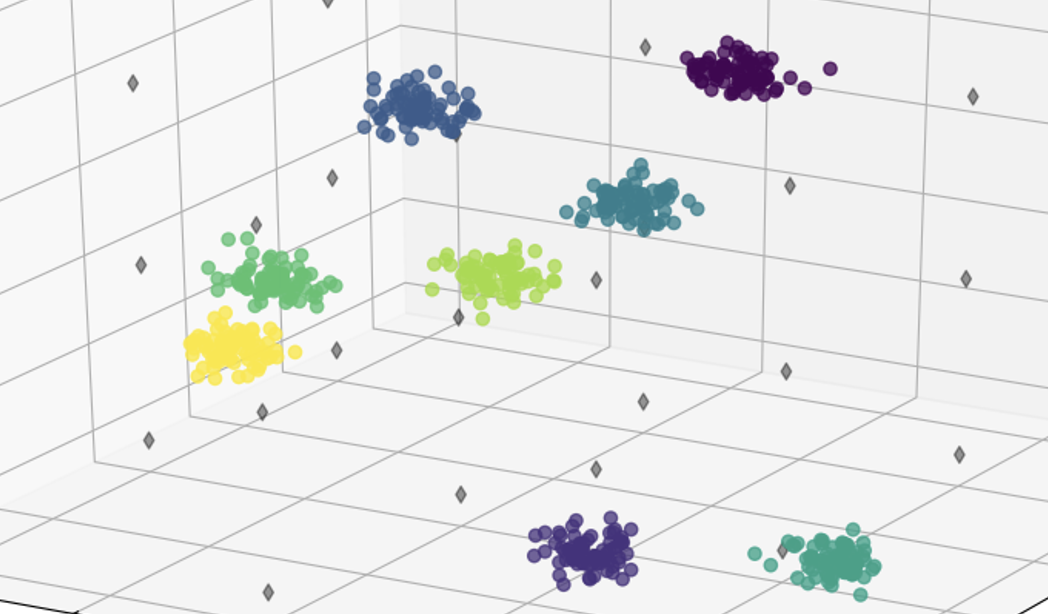

In [2]:

n_samples_per_class = 500
n_features = 2
noise = 0.9  

center_class1 = np.array([3, 3])
center_class2 = np.array([-3, -3])

np.random.seed(22)


class_1points = np.random.normal(loc=center_class1, scale=1.0, size=(n_samples_per_class, n_features))
class_1labels = np.zeros(n_samples_per_class)

class_2points = np.random.normal(loc=center_class2, scale=1.0, size=(n_samples_per_class, n_features))
class_2labels = np.ones(n_samples_per_class)

X = np.vstack((class_1points, class_2points))
y = np.concatenate((class_1labels, class_2labels))

df = pd.DataFrame(X, columns=['x', 'y'])
df['class'] = y

df.to_csv('two_class.csv', index=False)



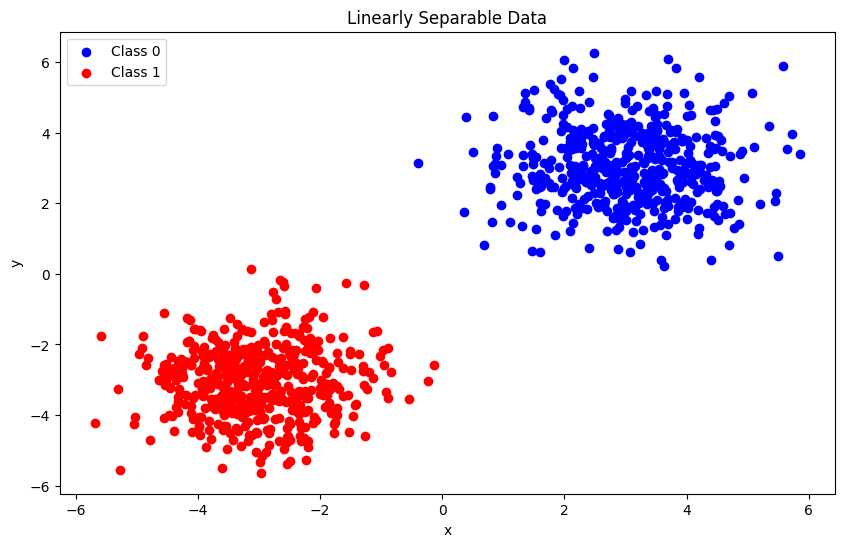

In [3]:

plt.figure(figsize=(10, 6))
plt.scatter(df[df['class'] == 0]['x'], df[df['class'] == 0]['y'], color='blue', label='Class 0')
plt.scatter(df[df['class'] == 1]['x'], df[df['class'] == 1]['y'], color='red', label='Class 1')



plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


In [ ]:
#code

**Завдання 2: Синтезувати набір даних, який складається з трьох множин (класів), що мають часткове перекриття, для використання в задачах класифікації та аналізу даних.**

**Роз'яснення до завдання 2:**

1. **Опис набору даних:**
   - Набір даних повинен містити три класифікаційні мітки (клас 1, клас 2, клас 3).
   - Кожен об'єкт набору даних повинен бути представленим у вигляді точки в двовимірному просторі $(x, y)$.

2. **Вимоги до генерації даних:**
   - Дані мають утворювати три множини, кожна з яких розподілена навколо свого центру, але з перекриттям з іншими множинами.
   - Кожен клас повинен мати певну ступінь перекриття з іншими класами, що призводить до часткової змішуваності точок з різними мітками.
   - Можливі варіанти синтезу:
     - Використання нормального розподілу для генерації точок навколо центроїдів кожного класу.
     - Додавання більшого шуму або кореляції між точками для збільшення ступеня перекриття.

3. **Параметри набору даних:**
   - Кількість точок (об'єктів) у наборі даних: **300** для кожного класу (всього **900**).
   - Формат вихідних даних: CSV-файл, де кожен рядок містить значення координат $(x, y)$ і відповідну мітку класу.

4. **Очікуваний результат:**
   - CSV-файл, який містить **900** рядків з трьома колонками: $x$, $y$, $class$.
   - Побудуйте графік з нанесеними точками для всіх трьох класів, щоб візуалізувати перекриття множин.
   - Перевірте, чи дійсно дані утворюють перекриття між класами, показавши частку точок, які належать до зон перекриття.

5. **Додаткові умови:**
   - Побудуйте кореляційні графіки та гістограми розподілу для кожного класу.
   - Опишіть підходи, які використовувалися для створення набору даних, і обґрунтуйте вибір параметрів.

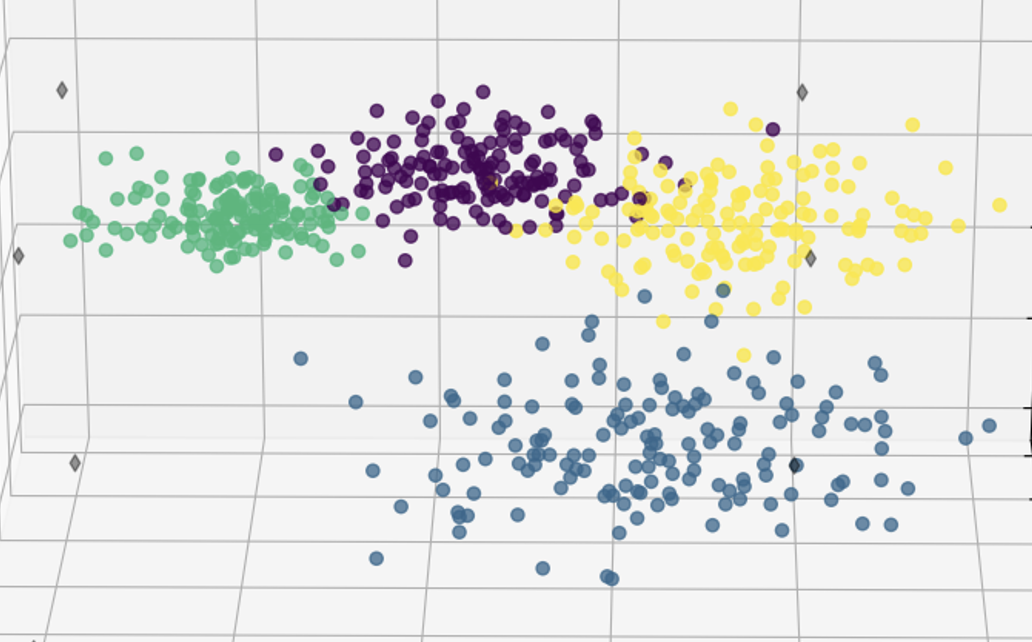

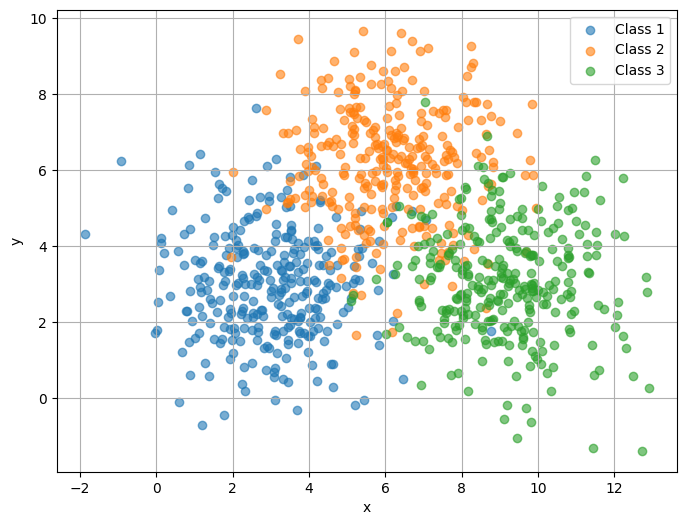

In [3]:
np.random.seed(42)

center_class1 = np.array([3, 3])
center_class2 = np.array([6, 6])
center_class3 = np.array([9, 3])

num_points = 300
spread = 1.5

x1 = np.random.normal(center_class1[0], spread, num_points)
y1 = np.random.normal(center_class1[1], spread, num_points)
class1 = np.ones(num_points)

x2 = np.random.normal(center_class2[0], spread, num_points)
y2 = np.random.normal(center_class2[1], spread, num_points)
class2 = np.ones(num_points) * 2

x3 = np.random.normal(center_class3[0], spread, num_points)
y3 = np.random.normal(center_class3[1], spread, num_points)
class3 = np.ones(num_points) * 3

df = pd.DataFrame({
    'x': np.concatenate([x1, x2, x3]),
    'y': np.concatenate([y1, y2, y3]),
    'class': np.concatenate([class1, class2, class3])
})

df.to_csv('three_class.csv.csv', index=False)

plt.figure(figsize=(8, 6))
plt.scatter(x1, y1, label='Class 1', alpha=0.6)
plt.scatter(x2, y2, label='Class 2', alpha=0.6)
plt.scatter(x3, y3, label='Class 3', alpha=0.6)

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


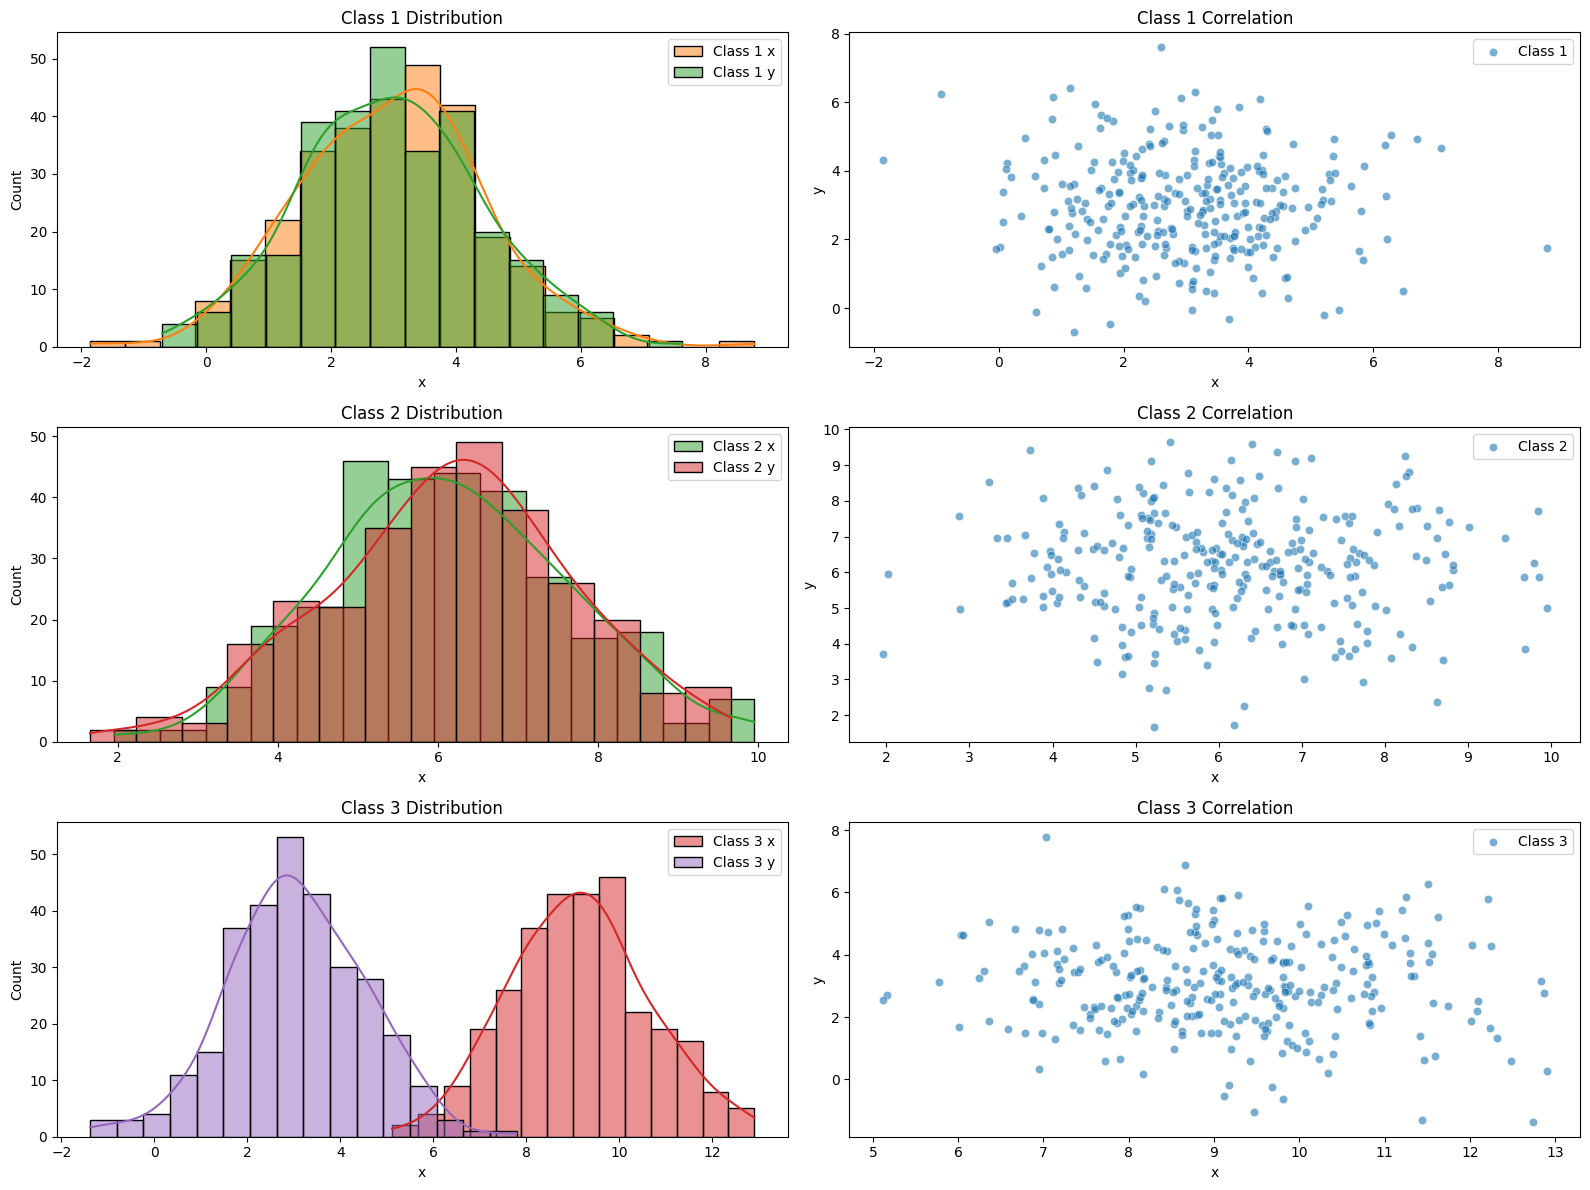

In [7]:

plt.figure(figsize=(16, 12))

for label in df['class'].unique():
    subset = df[df['class'] == label]
    
    plt.subplot(3, 2, int(label * 2) - 1)
    sns.histplot(subset['x'], kde=True, color=f'C{int(label)}', label=f'Class {int(label)} x')
    sns.histplot(subset['y'], kde=True, color=f'C{int(label)+1}', label=f'Class {int(label)} y', alpha=0.5)
    plt.legend()
    plt.title(f'Class {int(label)} Distribution')
    
    plt.subplot(3, 2, int(label * 2))
    sns.scatterplot(x=subset['x'], y=subset['y'], label=f'Class {int(label)}', alpha=0.6)
    plt.title(f'Class {int(label)} Correlation')

plt.tight_layout()
plt.show()


In [ ]:
#code

In [ ]:
#code

**Завдання 3: Синтезувати набір даних, який складається з двох множин у формі "тор в торі", де одна множина має форму внутрішнього тора, а інша — зовнішнього тора.**

**Роз'яснення до завдання 3:**

1. **Опис набору даних:**
   - Набір даних повинен містити дві класифікаційні мітки (клас 1 і клас 2).
   - Кожен об'єкт набору даних повинен бути представленим у вигляді точки в двовимірному просторі $(x, y)$.

2. **Вимоги до генерації даних:**
   - Дані повинні утворювати дві множини у формі тора: одна множина повинна бути розташована всередині іншої (тобто, "тор в торі").
   - Внутрішній тор (клас 1) повинен мати менший радіус і ширину, ніж зовнішній тор (клас 2).
   - Розподіл точок повинен бути рівномірним вздовж кожного тора з додаванням невеликого шуму для забезпечення варіативності.

3. **Параметри набору даних:**
   - Кількість точок (об'єктів) у наборі даних: **500** для кожного класу (всього **1000**).
   - Формат вихідних даних: CSV-файл, де кожен рядок містить значення координат $(x, y) $і відповідну мітку класу.

4. **Очікуваний результат:**
   - CSV-файл, який містить **1000** рядків з трьома колонками: $x$, $y$, $class$.
   - Побудуйте графік з нанесеними точками для обох класів, щоб візуалізувати форму "тор в торі".
   - Перевірте розподіл точок уздовж кожного тора, побудувавши радіальні гістограми для кожного класу.

5. **Додаткові умови:**
   - Побудуйте окремі графіки, які демонструють розподіл даних для кожного тора окремо.
   - Опишіть процес генерації даних та поясніть вибір параметрів для кожного тора.

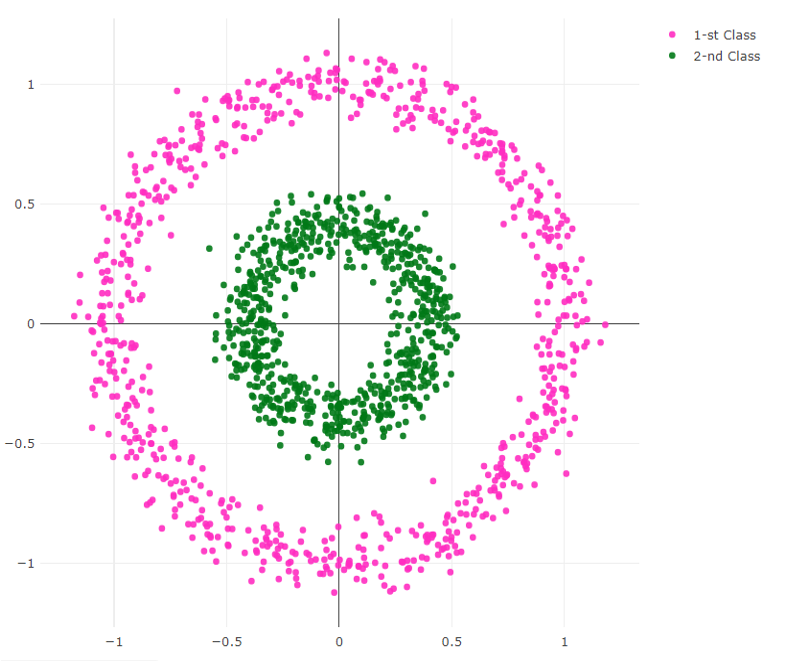

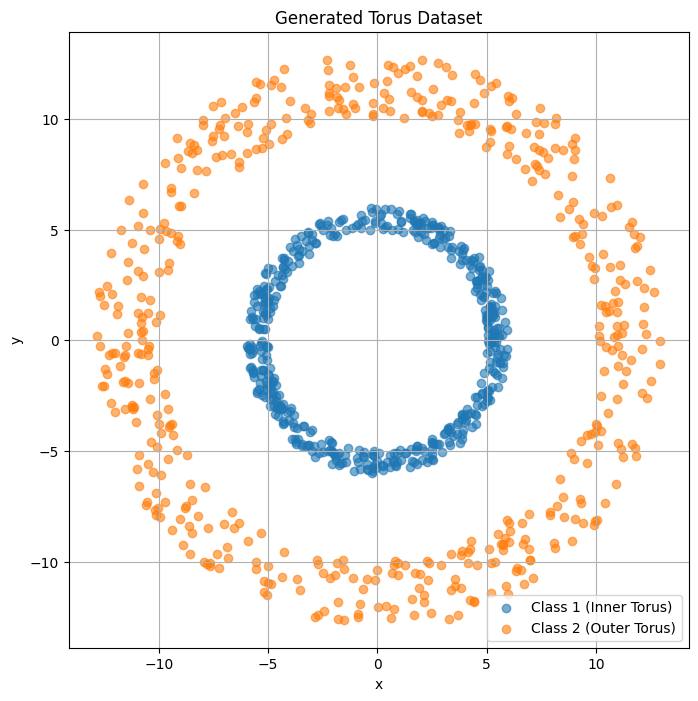

In [48]:
np.random.seed(22)
num_points = 500

inner_radius = 5
inner_width = 1

outer_radius = 10
outer_width = 3

theta1 = 2 * np.pi * np.random.rand(num_points)
r1 = inner_radius + inner_width * np.random.rand(num_points)
x1 = r1 * np.cos(theta1)
y1 = r1 * np.sin(theta1)
class1 = np.ones(num_points)

theta2 = 2 * np.pi * np.random.rand(num_points)
r2 = outer_radius + outer_width * np.random.rand(num_points)
x2 = r2 * np.cos(theta2)
y2 = r2 * np.sin(theta2)
class2 = np.ones(num_points) * 2


df_torus = pd.DataFrame({
    'x': np.concatenate([x1, x2]),
    'y': np.concatenate([y1, y2]),
    'class': np.concatenate([class1, class2])
})

df_torus.to_csv('torus_dataset.csv', index=False)

plt.figure(figsize=(8, 8))
plt.scatter(x1, y1, label='Class 1', alpha=0.6)
plt.scatter(x2, y2, label='Class 2', alpha=0.6)
plt.title('Generated Torus Dataset')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#code

In [ ]:
#code

In [ ]:
#code

**Завдання 4: Синтезувати набір даних, який складається з двох множин, що утворюють подвійну спіраль, де одна спіраль огортає іншу.**

**Роз'яснення до завдання 4:**

1. **Опис набору даних:**
   - Набір даних повинен містити дві класифікаційні мітки (клас 1 і клас 2).
   - Кожен об'єкт набору даних повинен бути представленим у вигляді точки в двовимірному просторі $(x, y)$.

2. **Вимоги до генерації даних:**
   - Дані повинні утворювати дві спіралі, закручені одна в іншу, так щоб кожна спіраль відповідала одному з класів.
   - Спіралі повинні мати протилежні напрямки закручування (одна за годинниковою стрілкою, інша — проти).
   - Кожна спіраль повинна бути рівномірно заповнена точками з невеликим додаванням шуму для варіативності даних.

3. **Параметри набору даних:**
   - Кількість точок (об'єктів) у наборі даних: **500** для кожного класу (всього **1000**).
   - Формат вихідних даних: CSV-файл, де кожен рядок містить значення координат $(x, y)$ і відповідну мітку класу.

4. **Очікуваний результат:**
   - CSV-файл, який містить **1000** рядків з трьома колонками: $x$, $y$, $class$.
   - Побудуйте графік з нанесеними точками для обох спіралей, щоб візуалізувати структуру "спіраль у спіралі".
   - Проаналізуйте відмінності у розподілі точок для обох класів та оцініть складність їх розділення.

5. **Додаткові умови:**
   - Створіть окремі графіки, що показують як закручується кожна спіраль.
   - Опишіть процес генерації даних, включаючи параметри, що використовувалися для визначення форми спіралей.

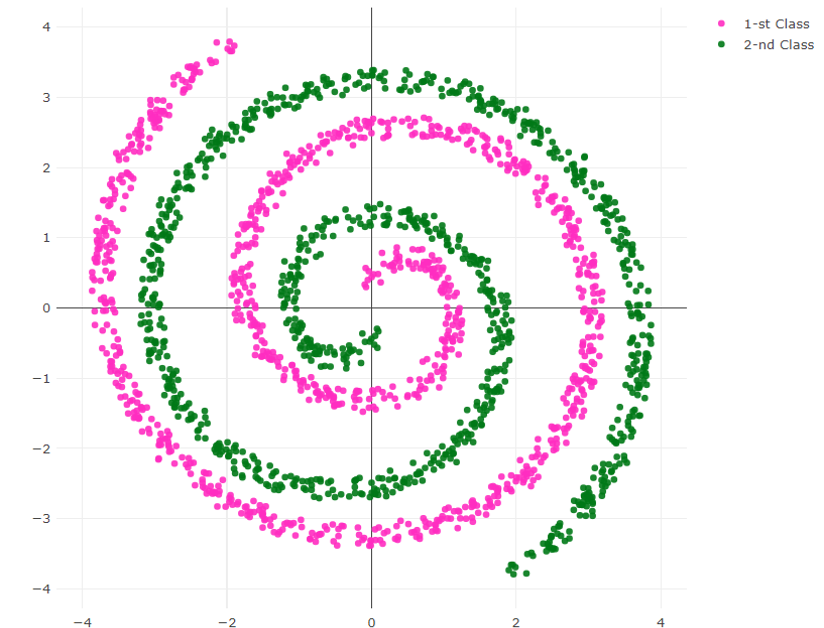

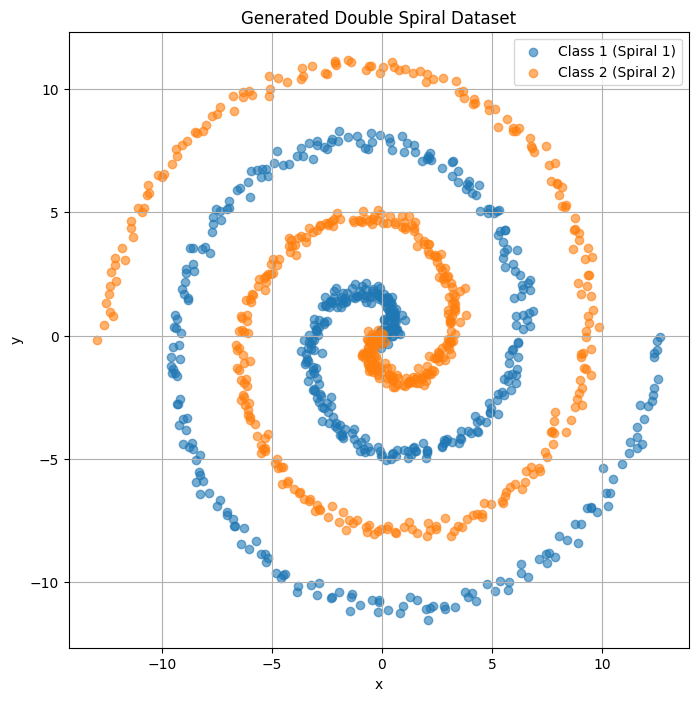

In [49]:
np.random.seed(22)
num_points = 500

theta = np.linspace(0, 4 * np.pi, num_points)  
z_noise = 0.2  

r1 = theta
x1 = r1 * np.cos(theta) + z_noise * np.random.randn(num_points)
y1 = r1 * np.sin(theta) + z_noise * np.random.randn(num_points)
class1 = np.ones(num_points)

r2 = theta
x2 = -r2 * np.cos(theta) + z_noise * np.random.randn(num_points)
y2 = -r2 * np.sin(theta) + z_noise * np.random.randn(num_points)
class2 = np.ones(num_points) * 2

df_spiral = pd.DataFrame({
    'x': np.concatenate([x1, x2]),
    'y': np.concatenate([y1, y2]),
    'class': np.concatenate([class1, class2])
})

df_spiral.to_csv('double_spiral_dataset.csv', index=False)

plt.figure(figsize=(8, 8))
plt.scatter(x1, y1, label='Class 1 (Spiral 1)', alpha=0.6)
plt.scatter(x2, y2, label='Class 2 (Spiral 2)', alpha=0.6)
plt.title('Generated Double Spiral Dataset')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#code

In [ ]:
#code

In [ ]:
#code

**Завдання 5: Синтезувати кілька наборів даних, що описують траєкторії системи Лоренца з різними параметрами, дослідити вплив параметрів на динаміку системи та візуалізувати результати.**


### 5.1: Теоретичне підґрунтя

**Опис системи Лоренца:**
Система Лоренца — це набір трьох нелінійних диференціальних рівнянь, що описують динаміку тривимірної системи з хаотичною поведінкою. Вона визначається такими рівняннями:

$$
\frac{dx}{dt} = \sigma (y - x)
$$

$$
\frac{dy}{dt} = x (\rho - z) - y
$$

$$
\frac{dz}{dt} = xy - \beta z
$$

Де:
- $(x, y, z)$ — змінні стану системи.
- $\sigma$ — параметр, що відповідає за швидкість зміни (часто називають "параметр Прандтля").
- $\rho$ — параметр, що відповідає за різницю температур у системі (відповідає за інтенсивність конвекції).
- $\beta$  — параметр, що відповідає за співвідношення розмірів.

**Роз'яснення до завдання:**
- Згенерувати дані для системи Лоренца за допомогою різних значень параметрів $\sigma$, $\rho$ та $\beta$.
- Проаналізувати вплив зміни параметрів на траєкторії системи.
- Візуалізувати результати в тривимірному просторі для кожного набору даних.

### 5.2: Генерація та візуалізація набору даних

**Що треба зробити:**

1. **Генерація даних:**
   - Вибрати декілька різних комбінацій параметрів $\sigma$, $\rho$ та $\beta$.
   - Використовуючи числовий метод (наприклад, метод Рунге-Кутти 4-го порядку), згенерувати траєкторії системи Лоренца для кожного набору параметрів.

2. **Візуалізація:**
   - Для кожного набору параметрів побудувати тривимірні графіки траєкторій.
   - Відобразити траєкторії в просторі $(x, y, z)$.

3. **Аналіз:**
   - Порівняти результати для різних наборів параметрів.
   - Описати, як зміна кожного з параметрів впливає на поведінку системи (наприклад, перехід від стабільного до хаотичного режиму).

**Очікуваний результат:**
- Кілька наборів даних, що описують траєкторії системи Лоренца з різними параметрами (мінімум 3).
- Візуалізації цих траєкторій у тривимірному просторі.
- Аналіз і опис впливу параметрів на динаміку системи.

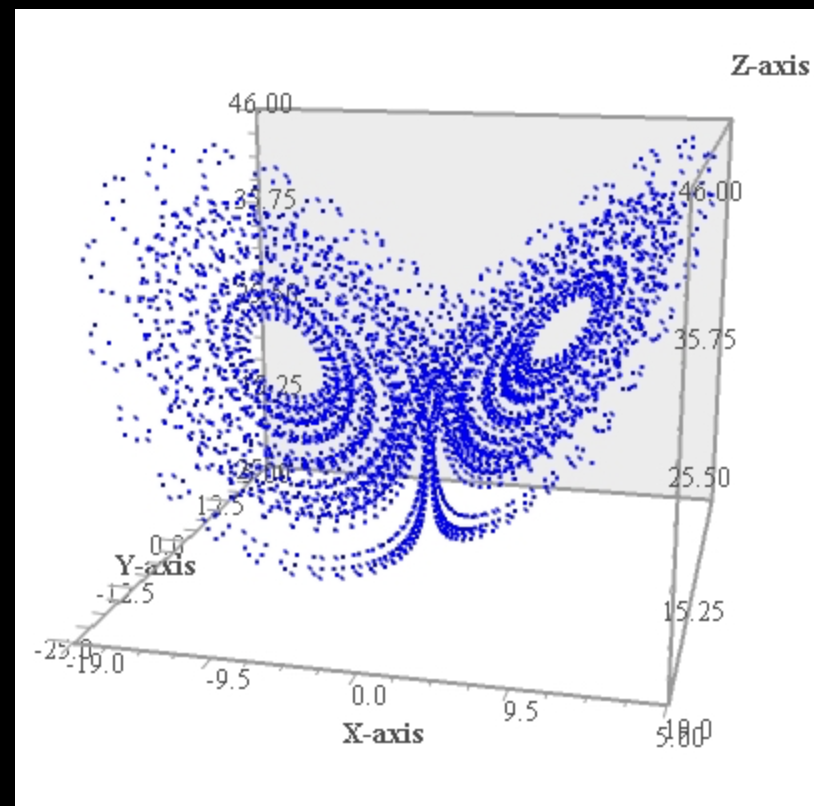

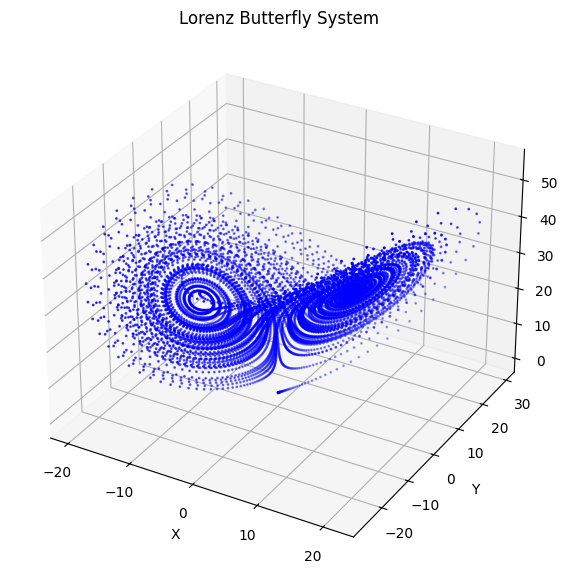

In [4]:
sigma = 10
rho = 28
beta = 2.667

x0, y0, z0 = 0.1, 0, 0

dt = 0.01
num_steps = 10000

xs = np.empty(num_steps + 1)
ys = np.empty(num_steps + 1)
zs = np.empty(num_steps + 1)

xs[0], ys[0], zs[0] = x0, y0, z0

for i in range(num_steps):
    x_dot = sigma * (ys[i] - xs[i])
    y_dot = xs[i] * (rho - zs[i]) - ys[i]
    z_dot = xs[i] * ys[i] - beta * zs[i]
    xs[i + 1] = xs[i] + x_dot * dt
    ys[i + 1] = ys[i] + y_dot * dt
    zs[i + 1] = zs[i] + z_dot * dt

df_lorenz = pd.DataFrame({'x': xs, 'y': ys, 'z': zs})

df_lorenz.to_csv('lorenz_system_dataset1.csv', index=False)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, ys, zs, s=1, color='blue')  
ax.set_title('Lorenz Butterfly System')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()


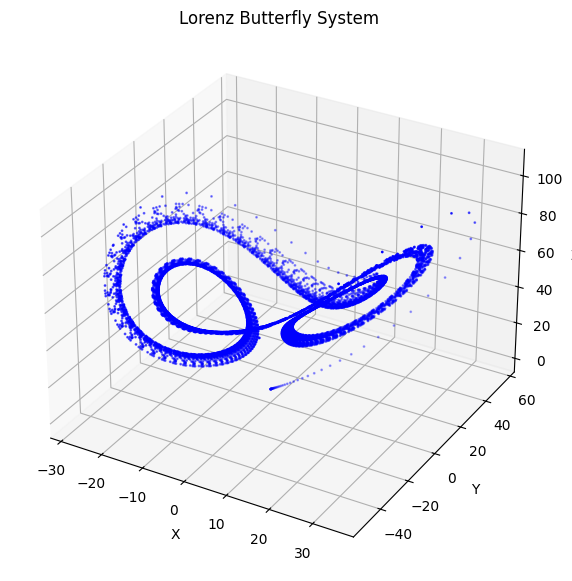

In [26]:
sigma = 10
rho = 50
beta = 4

x0, y0, z0 = 0.1, 0, 0

dt = 0.01
num_steps = 10000

xs = np.empty(num_steps + 1)
ys = np.empty(num_steps + 1)
zs = np.empty(num_steps + 1)

xs[0], ys[0], zs[0] = x0, y0, z0

for i in range(num_steps):
    x_dot = sigma * (ys[i] - xs[i])
    y_dot = xs[i] * (rho - zs[i]) - ys[i]
    z_dot = xs[i] * ys[i] - beta * zs[i]
    xs[i + 1] = xs[i] + x_dot * dt
    ys[i + 1] = ys[i] + y_dot * dt
    zs[i + 1] = zs[i] + z_dot * dt

df_lorenz = pd.DataFrame({'x': xs, 'y': ys, 'z': zs})

df_lorenz.to_csv('lorenz_system_dataset2.csv', index=False)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, ys, zs, s=1, color='blue')  
ax.set_title('Lorenz Butterfly System')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()


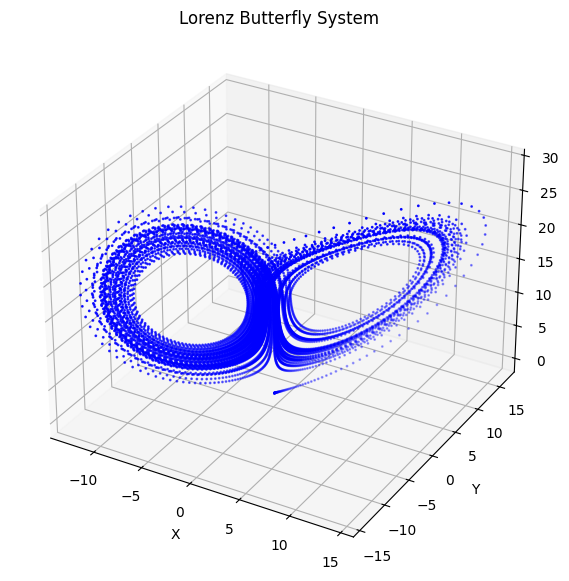

In [39]:
sigma = 15
rho = 16
beta = 2

x0, y0, z0 = 0.1, 0, 0

dt = 0.01
num_steps = 10000

xs = np.empty(num_steps + 1)
ys = np.empty(num_steps + 1)
zs = np.empty(num_steps + 1)

xs[0], ys[0], zs[0] = x0, y0, z0

for i in range(num_steps):
    x_dot = sigma * (ys[i] - xs[i])
    y_dot = xs[i] * (rho - zs[i]) - ys[i]
    z_dot = xs[i] * ys[i] - beta * zs[i]
    xs[i + 1] = xs[i] + x_dot * dt
    ys[i + 1] = ys[i] + y_dot * dt
    zs[i + 1] = zs[i] + z_dot * dt

df_lorenz = pd.DataFrame({'x': xs, 'y': ys, 'z': zs})

df_lorenz.to_csv('lorenz_system_dataset2.csv', index=False)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, ys, zs, s=1, color='blue')  
ax.set_title('Lorenz Butterfly System')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()
